## Work so far

### Getting information from NY Board of Elections
I downloaded the data at https://www.elections.ny.gov/CFViewReports.html#DBaseFiles.  This has donations matched to the organizations that filed the donations, each identified with an ID number.  Unfortunately donors do not also have ID numbers.  

You can see there is a link labeled "To match the filing data files to Filer Names by filer ID you will need to Download the Filer data file. "  Just the list of who filed donations is a daunting file (see [here](http://www.elections.ny.gov:8080/plsql_browser/active_comm)!  I did a rough job matching filer IDs to candidates and parties by their last name and district using the info on [this page](http://www.elections.ny.gov:8080/reports/rwservlet?cmdkey=nysboe_incumbnt)

**IMPORTANT**: this means I am missing some unknown number of non-IDC senate campaign filers if their committee has some weird non-obvious name.  Also, I did not try to get any of the filers for candidates who were not elected (challengers). This can definitely be done better. 

Here's a random set of donation entries that shows what you get from NY elections-- it's kind of a mess.  Mainly because the donor names don't have to be consistent (please ignore the computer code bits).  

In [31]:
sen_data.iloc[np.random.choice(75000,10),:].loc[:,maincol]

,FILER_ID,TRANSACTION_CODE,AMOUNT_70,E_YEAR,DATE1_10,CORP_30,FIRST_NAME_40,LAST_NAME_44,ADDR_1_50,CITY_52,STATE_54,ZIP_56
317,A68255,F,190.00,2016,06/22/2016,LISA LOPEZ,NaN,NaN,"FL 1, 335 ETNA ST",BROOKLYN,NY,11208
241,A19788,F,441.19,2016,08/26/2016,TIME WARNER CABLE BUSINESS CLASS,NaN,NaN,PO BOX 77169,CHARLOTTE,NC,28271
662,A87355,A,500.00,2016,05/19/2016,NaN,ELISSA,KRAMER,24 W 10TH ST,NEW YORK,NY,10011
812,A88252,F,79.90,2015,06/29/2015,CABLEVISION,NaN,NaN,1111 STEWART AVENUE,BETHPAGE,NY,11714
516,A19788,B,250.00,2016,12/30/2015,YUMI BRANDS INC,NaN,NaN,PO BOX 32430,LOUISVILLE,KY,40232
610,A71095,F,173.40,2016,09/13/2016,IMPERIAL PIZZA,NaN,NaN,1035 ABBOTT RD,BUFFALO,NY,14220
862,A21132,A,300.00,2016,05/10/2016,LARKIN INGRASSIA & TEPERMAYSTER LLP,NaN,NaN,356 MEADOW AVE,NEWBURGH,NY,12550
136,A18416,F,61.15,2016,08/18/2016,"TIME WARNER CABLE, INC",NaN,NaN,2865 RICHMOND AVE,STATEN ISLAND,NY,10314
375,A18398,F,22.23,2016,07/22/2015,UNITEMIZED,NaN,NaN,NaN,NaN,NaN,NaN
851,A82955,A,2500.00,2016,09/19/2016,NaN,KENT,FREY,1000 PEARCE AVENUE,TONAWANDA,NY,14150


### From Filers to Candidates
So I matched the **FILER_ID** column to candidates and parties. Here you can see how much money was donated since beginning of 2016 to each of the IDC candidates (plus Felder, plus the IDC initiative campaign).  Klein and his committees move a bunch of money around (this plot removes anything where another political committee was the donor)

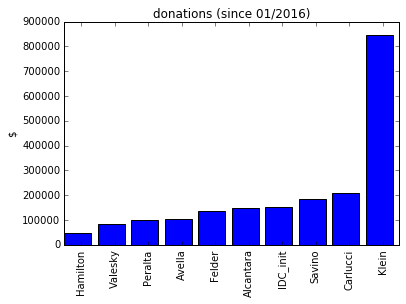

In [32]:
from IPython.display import Image 
Image(filename='pngs/totmoney.png')

### From Donors to donor categories
Then, I tried to simplify the names above in columns `CORP_30, FIRST_NAME_40, LAST_NAME_44`, so that multiple donations from the same donor could be matched up.  This is not perfect either, but it's not really feasible to do it manually because there are over 20,000 donation records to the NY Senate just since the beginning of 2016.  Then I grouped all the donations that seemed to be by the same people, and made sums for how much they donated to each party.  That's where Jonathan & co come in.  We need to figure out what obvious interests these donors have, so we're trying to code each one with their industry. 

So far Jonathan has coded almost **500**, accounting for 2 Million in donations since Jan 2016. There are still nearly **900** uncoded but these account for under 200k since Jan 2016.

Jonathan came up with these codes:

- POL: This is for political overhead groups that are mostly just moving money (i.e. not additional money but money that donors gave to, say, the Republican Party, which then disbursed it). We don't want to count this twice, e.g. Jeff Klein is the largest donor to the IDC, but that's money that other donors are already giving him that we've accounted for.
- RE: Real estate.
- HC: Health care (broadly to include insurance companies as well as hospitals and private doctors)
- LBR: Labor (public and private unions as well as public employee groups excluding police)
- CJ: Criminal justice
- E: Education
- L: Legal (law firms not specifically tied to government lobbying efforts)
- ALC: Alcohol/beer/wine industry
- TC: Telecommunications (including internet providers)
- FS: Financial services (broadly including investment firms, banks, hedge funds, tax and audit services)
- C: Conservative and general Republican donors (people that are difficult to classify as any individual industry, but are large conservative philanthropists who give to a wide range of Republican candidates)
- T: Transportation
- G: Gaming/gambling services
- LOB: Lobbyists (including law firms that specialize in lobbying)
- R: Retail industry
- FB: Food and beverage (including the restaurant industry, fast food, grocery stores, snack companies, and beverage companies)
- I: Insurance industry (excluding health care)
- TOB: Tobacco industry
- CN: Construction
- U: Utilities
- EG: Energy (oil, natural gas, solar, etc.)
- AGR: Agriculture
- D: General Democratic donors (same as C but for Democratic philanthropists)

## Preliminary results
Here's the breakdown for donation categories since Jan 2016 for the three, for the top donation categories.  You can see that IDC has way more real estate and healthcare, and less labor donations as compared to democrats.

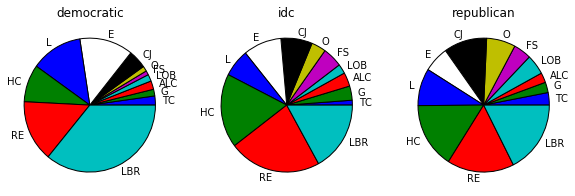

In [34]:
Image(filename='pngs/party_categories.png')

And here is info for the IDC candidates:

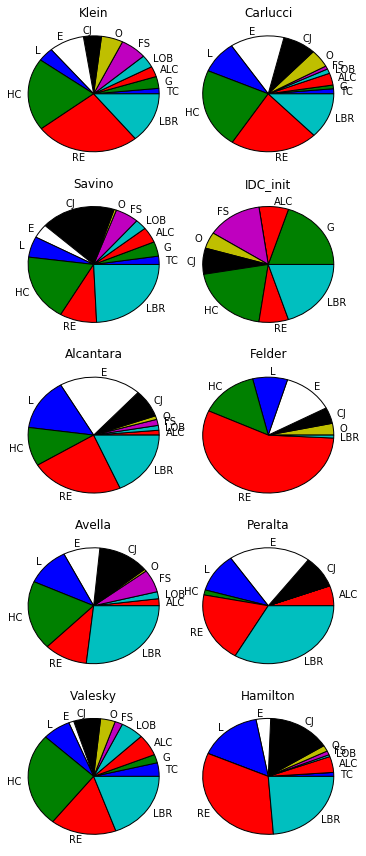

In [35]:
Image(filename='pngs/pie_per_idc.png')

In [33]:

from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt


sen_data = pd.read_pickle('sen_parties.pkl')

sen_data = sen_data.loc[sen_data['E_YEAR'].map(int)>2014,:]

maincol = [u'FILER_ID',u'TRANSACTION_CODE', u'AMOUNT_70', u'E_YEAR', u'DATE1_10',u'CORP_30', u'FIRST_NAME_40', u'LAST_NAME_44',u'ADDR_1_50', u'CITY_52', u'STATE_54', u'ZIP_56']